# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
#####**Name**- Dipali Solake

# **Project Summary -**

Yes bank is a wellknown bank in india which provides wide range of services and solutions rights from bank accounts, deposits, cards, cash management privilage banking, not resident india banking(NRI), Institutional banking, marchant acquiring, digital banking and agricultural banking solutions. As the data is all about stock price. So in this project I will be analysing the patterns of the dataset by performing exploratopry data analysis and try to build a model with help of machine learning for predicting the closing stock price.

The tools for data analysis and model building in this project are packages from python library such as numpy, pandas, matplotlib, seaborn, linear regression, lasso, ridge, elasticnet, MinMaxScalar, etc.      

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To develop a predictive model for forecasting the closing price of Yes Bank stock based on historical data and relevant features, enabling investors and stakeholders to make informed decisions regarding buying, selling, or holding Yes Bank shares.This dataset contains stock price information by monthly date.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error )
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')



<ipython-input-1-53a20ab8f76f>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drivr")

Mounted at /content/drivr


In [3]:
df = pd.read_csv("/content/drivr/MyDrive/data_YesBank_StockPrices (1).csv")

### Dataset First View

In [4]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(185, 5)

In [6]:
rows=df.shape[0]
rows

185

In [7]:
col=df.shape[1]
col

5

### Dataset Information

In [8]:
# Datas(et Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

Dataset contain 185 rows abs5 columns with different variable types. There is no missing values as well as zero duplicates in dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. Date - month and day information on which the information was recorded(Caregorical)
2. Open - Opening stock price (Numeric)
3. High - Highest stock price(numeric)
4. Low - lowest stock price (numeric)
5. Close - closing stock price (numeric)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for items in df.columns.tolist():
  print('The number of unique values in column', items, 'is', df[items].nunique())

The number of unique values in column Date is 185
The number of unique values in column Open is 183
The number of unique values in column High is 184
The number of unique values in column Low is 183
The number of unique values in column Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
df2 = df.copy()

In [15]:
df2

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [16]:
# Write your code to make your dataset analysis ready.
df2['Date'] = pd.to_datetime(df2['Date'].apply(lambda x : datetime.strptime(x, '%b-%y')))

In [17]:
df2.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

The given data has no missing values and duplicate values. the Date column was not arranged in proper format, I have changed the Date column in to the format Year-Month-Date that will be helpful to visualize the data.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
#**Univariate Analysis**

<Axes: xlabel='Close', ylabel='Density'>

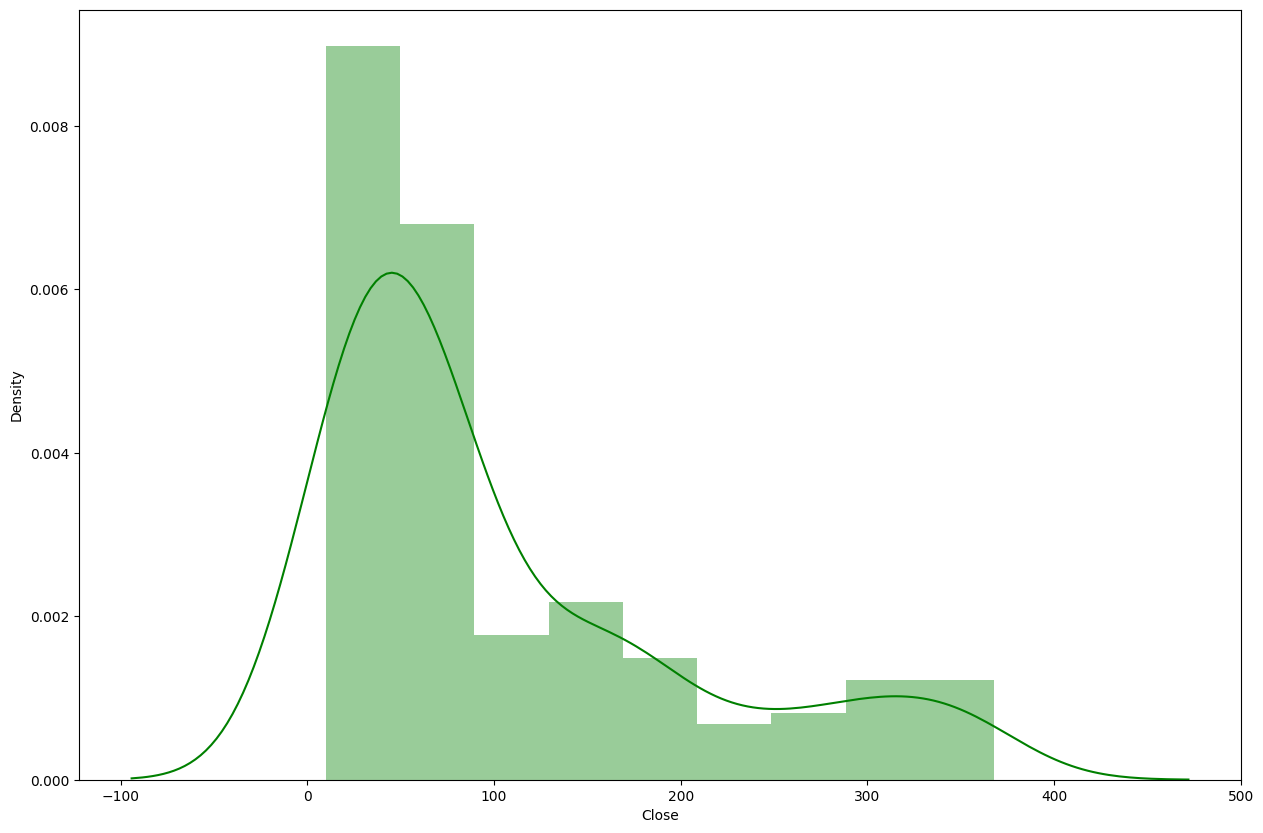

In [18]:
# Chart - 1 visualization code
plt.figure(figsize=(15,10))
sns.distplot(df2['Close'],color='g')

##### 1. Why did you pick the specific chart?

To see the distribution of closing price in the dataset I have used distplot as with the help of distplot I wiil be able to check the skewness of the data and according to that will be transformed to handle the skewness.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that the 'close' column data is possitively skewed. So I have to transform this column data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insights shows positive skewed distribution of close column. That will help me to understand and the methods to be applied to tackle the skewness of data.

#### Chart - 2

In [19]:
numeric_features=df2.describe().columns

In [20]:
numeric_features

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

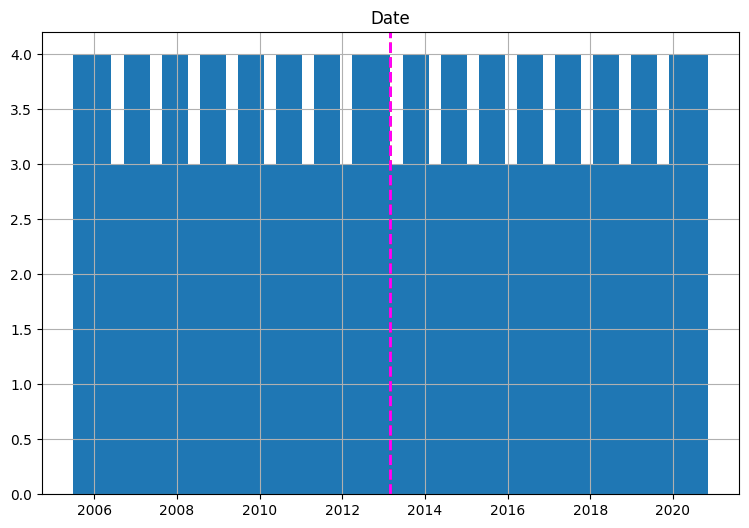

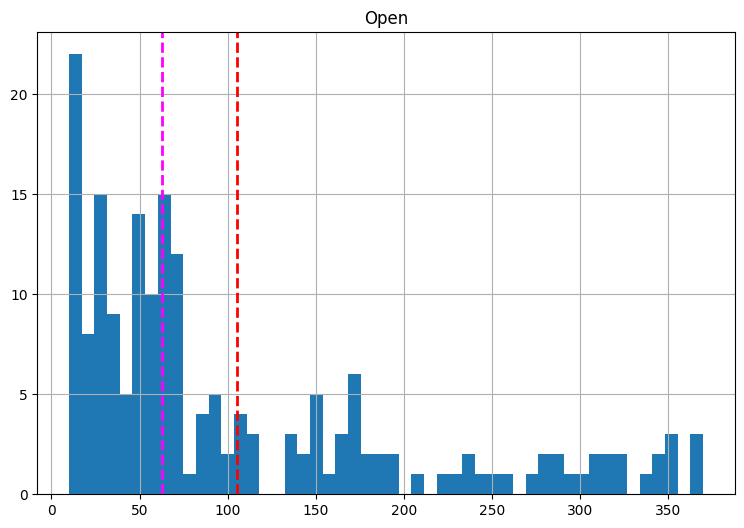

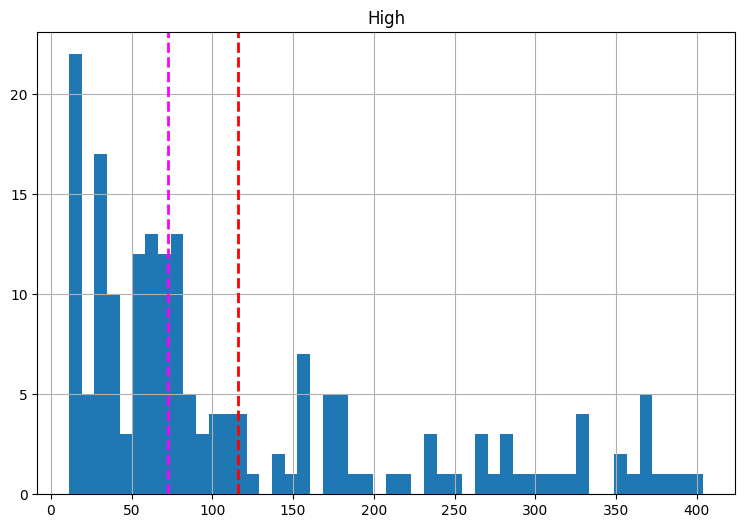

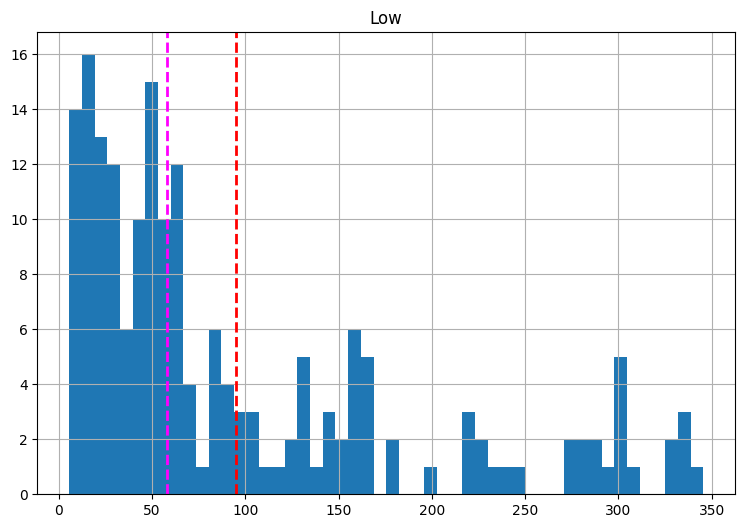

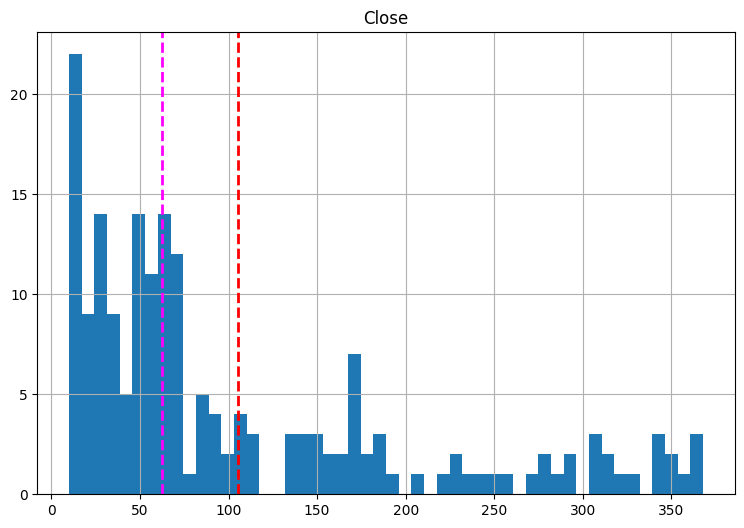

In [21]:
# Chart - 2 visualization code
for col in numeric_features :
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df2[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='Red', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='magenta', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()



##### 1. Why did you pick the specific chart?

As the histogram is very popular tool so that chart will show the overview of each and every variables information and gives clear idea about the data set. It also summarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

from the above chart it can be clearly seen that the numeric variables are possitively skewed. So I have to transform the columns data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes ,the gain insights shows the positive skewed distribution of all numeric columns that will help me to understand and the methods to be applied to tackle the skewness of data.

#### Chart - 3

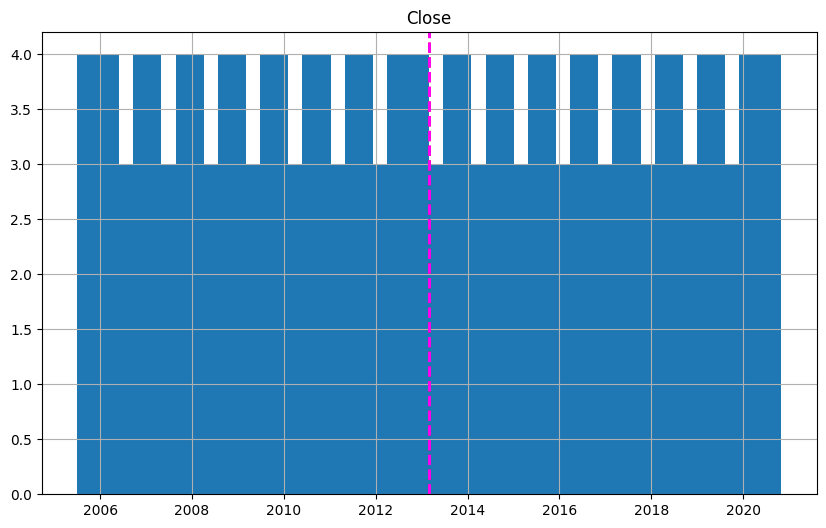

In [22]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = df2["Date"]
feature.hist(bins = 50, ax = ax)
ax.axvline(feature.mean(),color='Red', linestyle='dashed',linewidth=2)
ax.axvline(feature.median(),color='magenta', linestyle='dashed',linewidth=2)
ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of Date column which is categorical in the dataset , here I used distplot.

##### 2. What is/are the insight(s) found from the chart?

As the dayte column has categorical information  and from the dist plot it is clear that the column date is equally distributed.



#### Chart - 4
**Bivariate Analysis**

In [23]:
# Chart - 4 visualization code
ax = px.line(df2, df["Date"], df2['Close'], title="monthly closing price")
ax.update_layout(xaxis=dict(title='year'), yaxis=dict(title='closing price'))
ax.show()

##### 1. Why did you pick the specific chart?

Line charts are commonly used to display data trends over time or to show the relationship between two variables. They're effective because they emphasize the continuity of data points, making it easy to observe patterns, trends, and changes over time. Additionally, line charts are versatile and easy to understand, making them a popular choice for visualizing various types of data, from stock prices to temperature changes.

##### 2. What is/are the insight(s) found from the chart?

we can cleaarly see that the there stock price continuously increasing from 2014 to 2016

#### Chart - 5

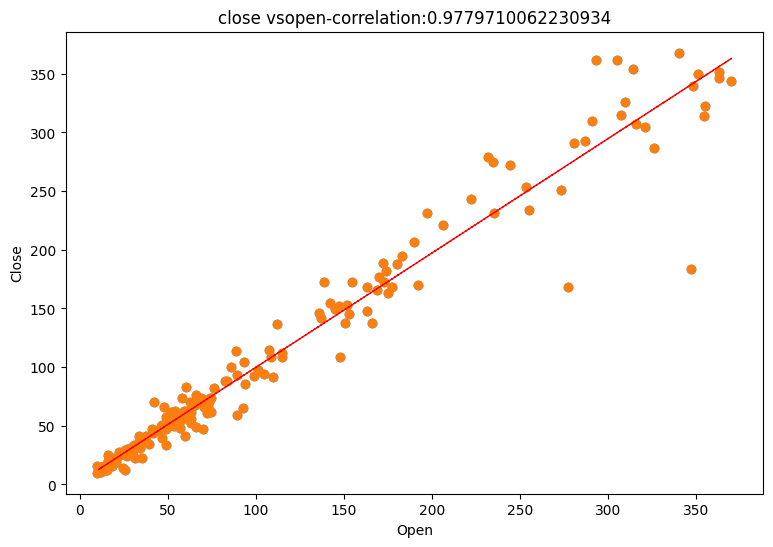

In [24]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
feature = df2['Open']
label = df2['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('close vs' + 'open' + '-correlation:'+ str(correlation))
z = np.polyfit(df2['Open'], df2['Close'], 1)
y_hat=np.poly1d(z)(df2['Open'])
plt.plot(df2['Open'], y_hat, 'r--', lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?


The above scatter plot shows the relationship between Oepn and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see thatthe open and close data are highly correlated therefore we can say that the closing price is very much dependant upon the opening price of data.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. the high corrrelation between the high and price indicates that high price will always play an important role in closing price.

#### Chart - 6

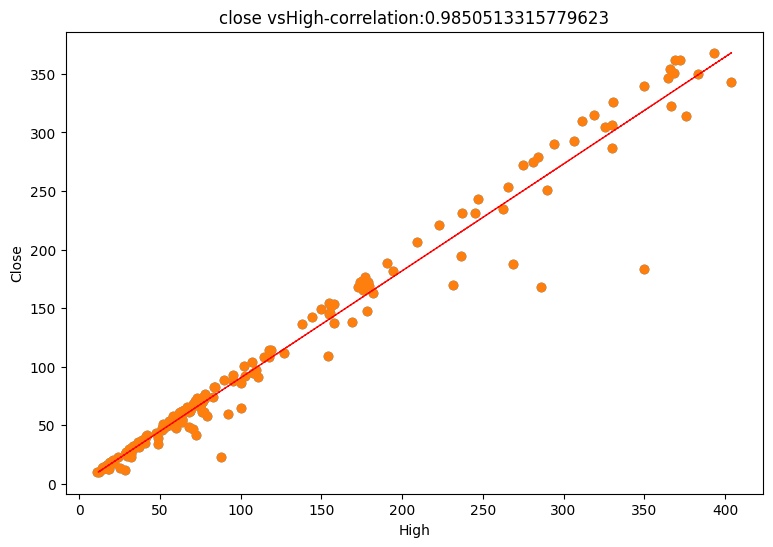

In [25]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
feature = df2['High']
label = df2['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('close vs' + 'High' + '-correlation:'+ str(correlation))
z = np.polyfit(df2['High'], df2['Close'], 1)
y_hat=np.poly1d(z)(df2['High'])
plt.plot(df2['High'], y_hat, 'r--', lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?


The above scatter plot shows the relationship between high and Close.

##### 2. What is/are the insight(s) found from the chart?

we can see the high and close columns are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes. the high correlation between high and closing price indicates that the high price always plays an impottant role in closing price.



#### Chart - 7

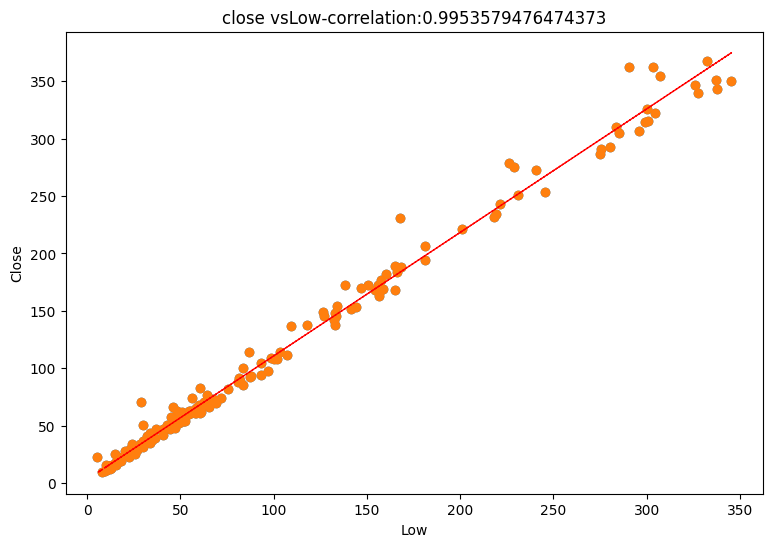

In [26]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
feature = df2['Low']
label = df2['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('close vs' + 'Low' + '-correlation:'+ str(correlation))
z = np.polyfit(df2['Low'], df2['Close'], 1)
y_hat=np.poly1d(z)(df2['Low'])
plt.plot(df2['Low'], y_hat, 'r--', lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relationship between high and Close.

##### 2. What is/are the insight(s) found from the chart?

we can see the low and close columns are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes. the high correlation between low and closing price indicates that the low price always plays an impottant role in closing price.

---



#### Chart - 8

<Axes: >

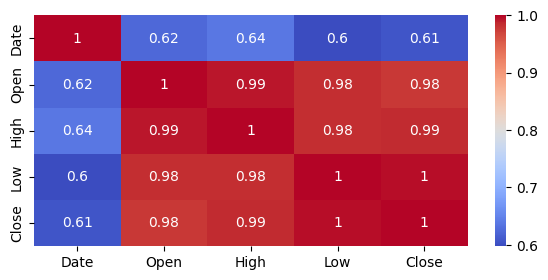

In [27]:
# Chart - 8 visualization code
# Correlation Heatmap
plt.figure(figsize=(7,3))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are graphical representations of data where values in a matrix are represented as colors. They are commonly used to visualize data in various fields like data analysis, biology, finance, and more. Heatmaps help identify patterns, trends, and anomalies in large datasets by highlighting areas with higher or lower values.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that each and every feature is highly correlated to each other. As the linear regression assumes that there is no multicollinearity ,Therfore we will try to reduce multicolinearity using transformation of variables and generating new features.

#### Chart - 9
**Pair plot**

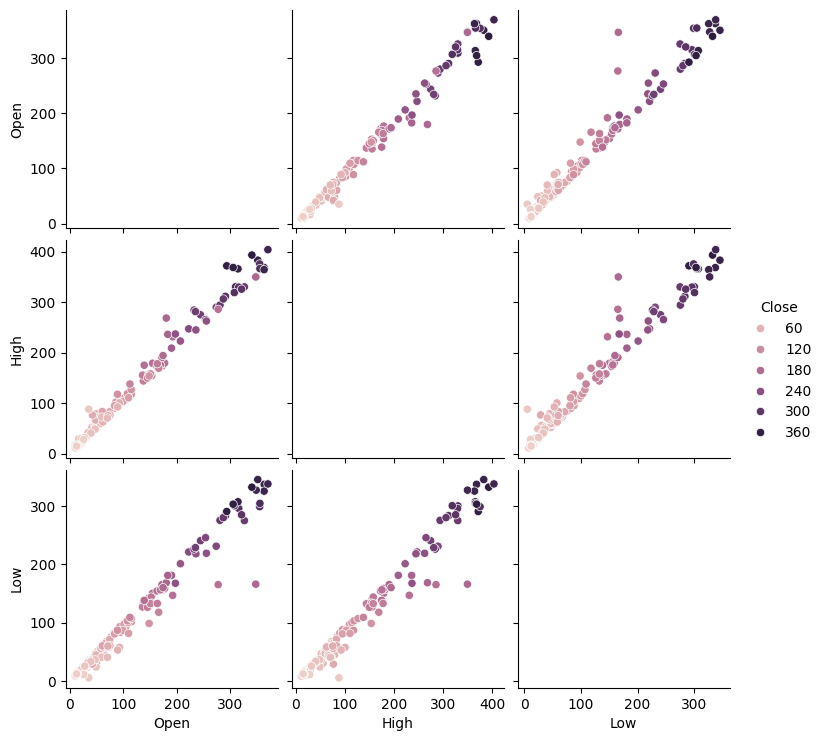

In [28]:
# Chart - 9 visualization code
# PAIR PLOT
sns.pairplot(df2, hue = 'Close')

##### 1. Why did you pick the specific chart?

A pairplot is a powerful visualization tool provided by libraries like Seaborn in Python. It creates a grid of scatterplots and histograms for multiple variables in a dataset, allowing you to quickly visualize relationships and distributions between them. It's great for exploring pairwise relationships in small to medium-sized datasets.

##### 2. What is/are the insight(s) found from the chart?

As I use close in the hue variable, above plot will show thedistribution of close with different variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [69]:
# Handling Missing Values & Missing Value Imputation
df2.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in dataset.

### 2. Handling Outliers

In [70]:
# Handling Outliers & Outlier treatments
fig = px.box(df2['Open'])
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

In [71]:
fig = px.box(np.log10(df2['Open']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [72]:
fig = px.box(df2['High'])
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

In [73]:
fig = px.box(np.log10(df2['High']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [75]:
fig = px.box(df2['Low'])
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

In [76]:
fig = px.box(np.log10(df2['Low']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

<Axes: xlabel='Close', ylabel='Density'>

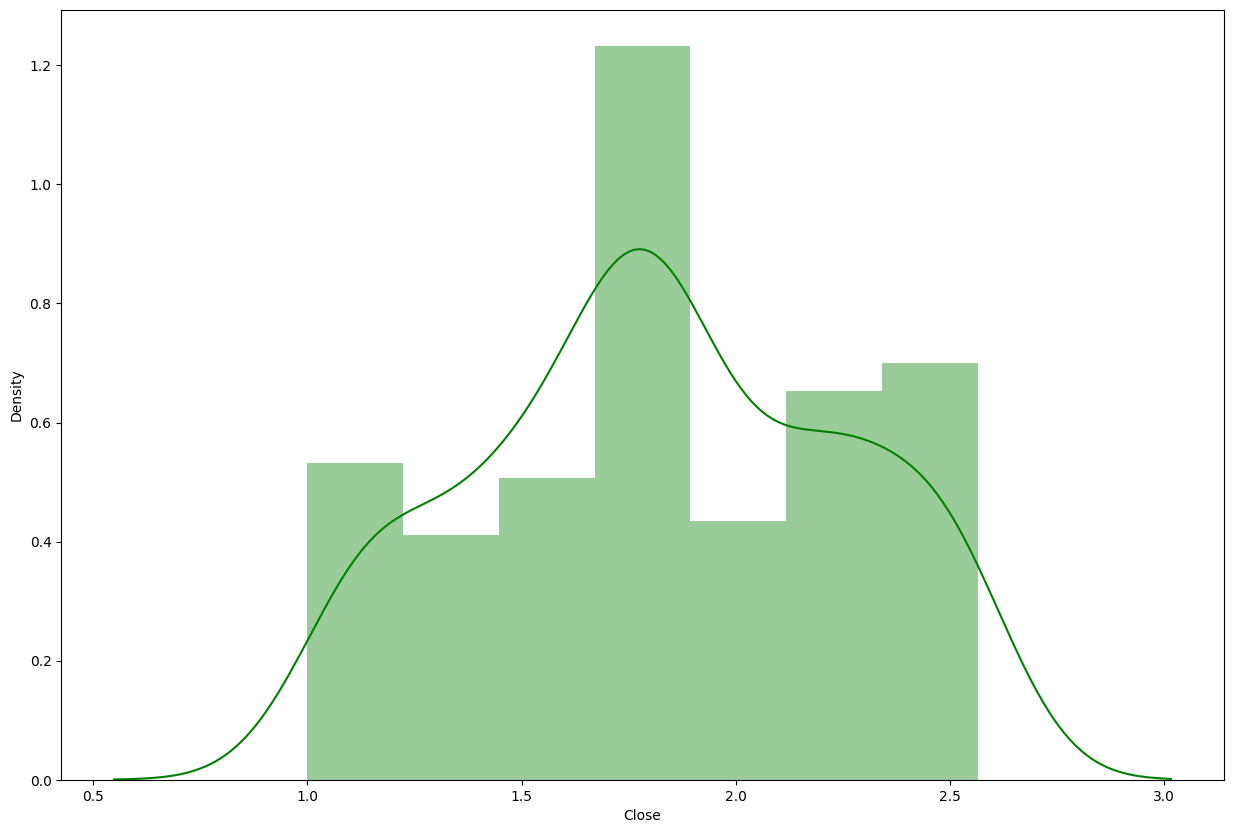

In [77]:
# Dependant variable price
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df2['Close']),color='g')

In [78]:
df2.set_index('Date', inplace=True)

In [79]:
# generating a new feature to tackle the high multicolineatity.
df2['average'] = df2[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [80]:
df2.head(10)

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37
2005-12-01,13.49,14.44,13.00,13.71,13.64
2006-01-01,13.68,17.16,13.58,15.33,14.81
2006-02-01,15.50,16.97,15.40,16.12,15.96
2006-03-01,16.20,20.95,16.02,20.08,17.72


In [90]:
dependant_variable = 'Close'

In [91]:
independent_variable = list(set(df2.columns.tolist())-{dependant_variable})

In [92]:
x = np.log10(df2[independent_variable]).values

In [93]:
y = np.log10(df2[dependant_variable]).values

##### What all outlier treatment techniques have you used and why did you use those techniques?

There were 3 independant features that had outliers shown in the above boxplot. So to handle the outliers as well as to tackle the skewness of the data I have transformed all the numeric featuresto log to base 10 values.

After the conversion of numeric features I again visualized them through the boxplot to show zero outliers.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [98]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

  #calculating vif
  vif=pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]

  return(vif)


In [99]:
calc_vif(df2[[i for i in df2.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,average,2.993476e+09


### 5. Data Transformation

In [101]:
# Transform Your data
x = np.log10(df2[independent_variable]).values
y = np.log10(df2[dependant_variable]).values

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

In [55]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [56]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [57]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [58]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [59]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [64]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [67]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [68]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***